In [35]:
import sys
import os
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
from src.backtest import Backtest
from src.strategies import PCA_FA
from src.utils import get_price_history, get_tickers

In [2]:
# get data
DATA_START = '2000-01-01'
DATA_END = '2010-12-31'

factors_df = pd.read_csv('../../src/data/fama_french_momentum_daily.csv')
factors_df['Date'] = pd.to_datetime(factors_df['Date'])
factors_df.set_index('Date', inplace=True)
factors_df = factors_df / 100 # convert to decimals

tickers = get_tickers('dow30')
prices = get_price_history(tickers, DATA_START, DATA_END)

[*********************100%%**********************]  30 of 30 completed

1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1293771600")


In [3]:
prices = prices.drop(columns=['DOW'])

In [4]:
pca_fa = PCA_FA(factors_df)
backtester = Backtest(pca_fa, prices, 'MS', 5, 'years')

In [5]:
backtester.run_backtest()

Running backtest...
Test 1/70 complete
Test 2/70 complete
Test 3/70 complete
Test 4/70 complete
Test 5/70 complete
Test 6/70 complete
Test 7/70 complete
Test 8/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 9/70 complete
Test 10/70 complete
Test 11/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 12/70 complete
Test 13/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 14/70 complete
Test 15/70 complete
Test 16/70 complete
Test 17/70 complete
Test 18/70 complete
Test 19/70 complete
Test 20/70 complete
Test 21/70 complete
Test 22/70 complete
Test 23/70 complete
Test 24/70 complete
Test 25/70 complete
Test 26/70 complete
Test 27/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 28/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 29/70 complete
Test 30/70 complete
Test 31/70 complete
Test 32/70 complete
Test 33/70 complete
Test 34/70 complete
Test 35/70 complete
Test 36/70 complete
Test 37/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 38/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 39/70 complete
Test 40/70 complete
Test 41/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 42/70 complete
Test 43/70 complete
Test 44/70 complete
Test 45/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 46/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 47/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 48/70 complete
Test 49/70 complete
Test 50/70 complete
Test 51/70 complete
Test 52/70 complete
Test 53/70 complete
Test 54/70 complete
Test 55/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 56/70 complete
Test 57/70 complete
Test 58/70 complete
Test 59/70 complete
Test 60/70 complete
Test 61/70 complete
Test 62/70 complete
Test 63/70 complete
Test 64/70 complete
Test 65/70 complete
Test 66/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test 67/70 complete
Test 68/70 complete


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test 69/70 complete
Test 70/70 complete


In [6]:
r_f = get_price_history(['^TNX'], '2005-01-01', DATA_END) / 100

[*********************100%%**********************]  1 of 1 completed


In [7]:
results = backtester.calculate_performance(r_f)

In [8]:
results

{'total_portfolio_value': 14734.099315719994,
 'total_returns': 0.47340993157199934,
 'average_returns': 0.005552205186950321,
 'annual_returns': 0.06869917239122314,
 'annual_std': 0.20363118434239233,
 'sharpe_ratio': 0.14269178148555586,
 'portfolio_history': [10000,
  10186.998457403286,
  10345.164572332922,
  10213.000085505842,
  10730.473568653435,
  10893.506417817887,
  11179.05371439712,
  11150.337387376097,
  11785.699499785642,
  11538.469081950967,
  12281.09431588164,
  12348.00842773034,
  12269.81987559516,
  12139.328628533262,
  11755.870795123667,
  11586.18374440996,
  11012.50239200404,
  10674.03714169419,
  11423.276389180428,
  12180.982960955349,
  12567.641331137676,
  12662.598852088278,
  13175.310414600164,
  13480.106669566194,
  13664.45996202092,
  13344.080142322831,
  13584.19980799656,
  14270.863987918263,
  16256.54774744952,
  15915.407263479188,
  15487.670602171145,
  15593.22206782508,
  16555.9320481857,
  17012.154098317744,
  17232.22774333

In [36]:
dates = [x['prediction_date'] for x in results['portfolios']]
dates.insert(0, results['portfolios'][0]['purchase_date'])

# convert to datetime
dates = [datetime.strptime(x, '%Y-%m-%d') for x in dates]

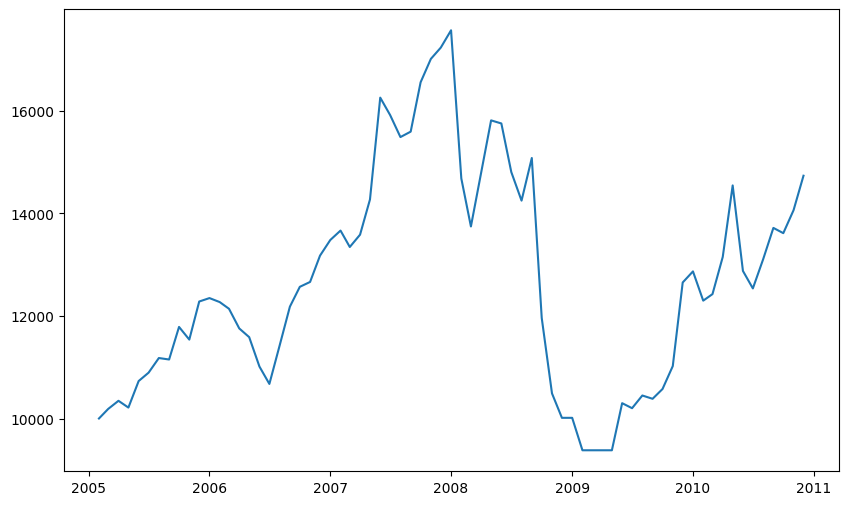

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(dates, results['portfolio_history'])

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 3.,
        1., 2., 3., 5., 2., 6., 6., 5., 8., 4., 2., 4., 5., 3., 3., 0., 0.,
        1., 1., 0., 0., 0., 2.]),
 array([-0.20686391, -0.19799389, -0.18912387, -0.18025386, -0.17138384,
        -0.16251382, -0.1536438 , -0.14477379, -0.13590377, -0.12703375,
        -0.11816373, -0.10929372, -0.1004237 , -0.09155368, -0.08268366,
        -0.07381365, -0.06494363, -0.05607361, -0.04720359, -0.03833358,
        -0.02946356, -0.02059354, -0.01172353, -0.00285351,  0.00601651,
         0.01488653,  0.02375654,  0.03262656,  0.04149658,  0.0503666 ,
         0.05923661,  0.06810663,  0.07697665,  0.08584667,  0.09471668,
         0.1035867 ,  0.11245672,  0.12132674,  0.13019675,  0.13906677,
         0.14793679]),
 <BarContainer object of 40 artists>)

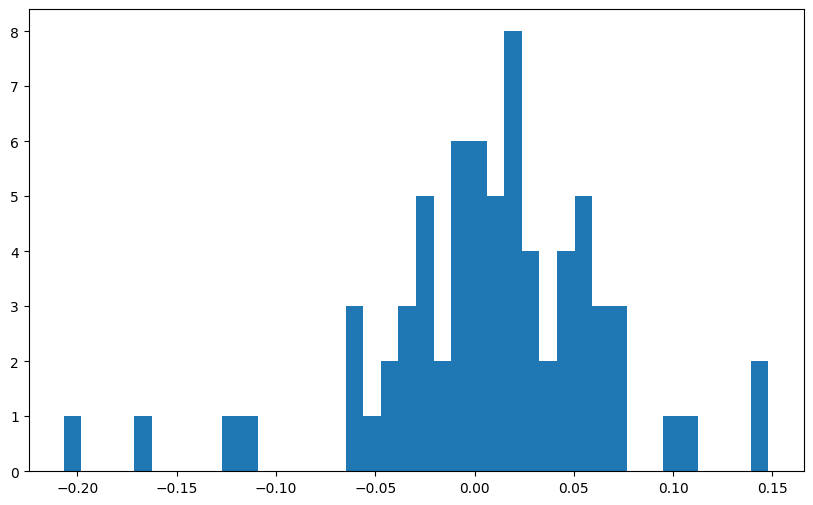

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(results['returns_history'], bins=40)